In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/binary.csv')

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


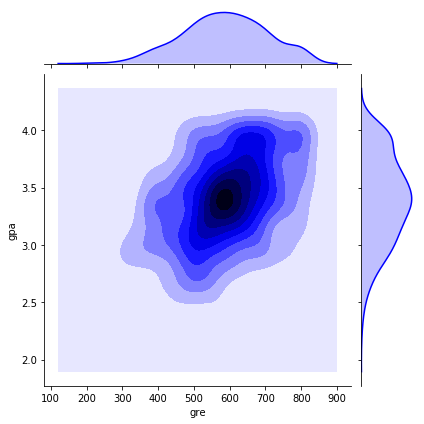

In [4]:
sns.jointplot(x= data['gre'], y= data['gpa'], data= data, kind= 'kde', color= 'blue')

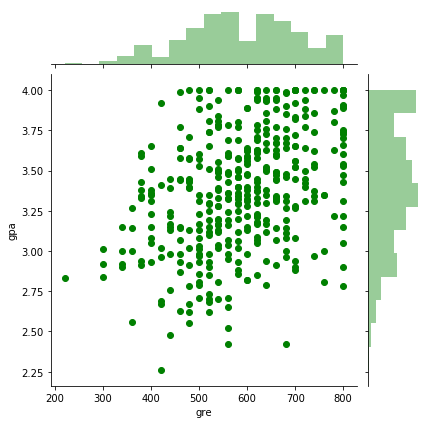

In [5]:
sns.jointplot(x= data['gre'], y= data['gpa'], data= data, color= 'green')

In [6]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
data1 = pd.get_dummies(data['rank'], prefix= 'rank')

In [8]:
data1.drop(['rank_1'], axis=1)

,rank_2,rank_3,rank_4
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
5,1,0,0
6,0,0,0
7,1,0,0
8,0,1,0
9,1,0,0


In [9]:
df = pd.concat([data, data1], axis = 1)

In [10]:
df.drop(['rank'], axis=1, inplace= True)

In [11]:
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [12]:
# Define independent and target variables

x = df.iloc[:,1:].values
y = df.iloc[:, 0:1].values

In [13]:
# Split the data into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [14]:
# import modules for logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [15]:
# Evaluate the model

from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

f1 = f1_score(y_test, y_pred)

print(f1)

[[75  7]
 [29  9]]
0.3333333333333333


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81        82
           1       0.56      0.24      0.33        38

   micro avg       0.70      0.70      0.70       120
   macro avg       0.64      0.58      0.57       120
weighted avg       0.67      0.70      0.66       120



<b> Creating a model with only gre and gpa as features </b>

In [18]:
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [19]:
df2 = df.drop(['rank_1', 'rank_2', 'rank_3', 'rank_4'], axis=1)

In [20]:
df2.head()

,admit,gre,gpa
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93


In [24]:
# Define independent and target variables

x2 = df2.iloc[:,1:3].values
y2 = df2.iloc[:, 0:1].values

In [25]:
# Split the dataset into training and teting datasets

x2_train, x2_test, y2_train, y2_test = train_test_split( x2, y2, test_size = 0.3, random_state = 0)

In [26]:
# Create the logistic regresion model

lr2 = LogisticRegression()

lr2.fit(x2_train, y2_train)

y2_pred = lr2.predict(x2_test)

In [28]:
# Calculate classification report

cr2 = classification_report(y2_test, y2_pred)

print(cr2)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        82
           1       0.00      0.00      0.00        38

   micro avg       0.68      0.68      0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120



<h2> Logistic Regression to predict diabetes </h2>

In [30]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
di = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/pima.csv')

In [34]:
di.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [35]:
cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin_level', 'bmi', 'pedigree', 'age', 'diabetes_level']

In [36]:
di = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/pima.csv', names = cols)

In [37]:
di.head()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_level
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
# Defining independent and target variables

x3 = di[['pregnant', 'insulin_level', 'bmi','age']].values

y3 = di['diabetes_level'].values

In [49]:
# split the data into training and testing datasets

x3_train, x3_test, y3_train, y3_test = train_test_split( x3, y3, test_size = 0.3, random_state = 0)

In [50]:
# Building a logistic regression model

lr3 = LogisticRegression()

lr3.fit(x3_train, y3_train)

y3_predict = lr3.predict(x3_test)

In [51]:
# Evaluating the model

cm3 = classification_report(y3_test, y3_predict)

print(cm3)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       157
           1       0.56      0.26      0.35        74

   micro avg       0.70      0.70      0.70       231
   macro avg       0.64      0.58      0.58       231
weighted avg       0.67      0.70      0.66       231

